In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Future Interns /SuperStore_Sales_Dataset.csv')

In [4]:
df

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.980,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,NaN,Online,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,907,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,NaN,COD,NaN,NaN
5897,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online,NaN,NaN
5898,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online,NaN,NaN
5899,909,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3,19.7910,NaN,COD,NaN,NaN


In [5]:
!pip install prophet
!pip install matplotlib


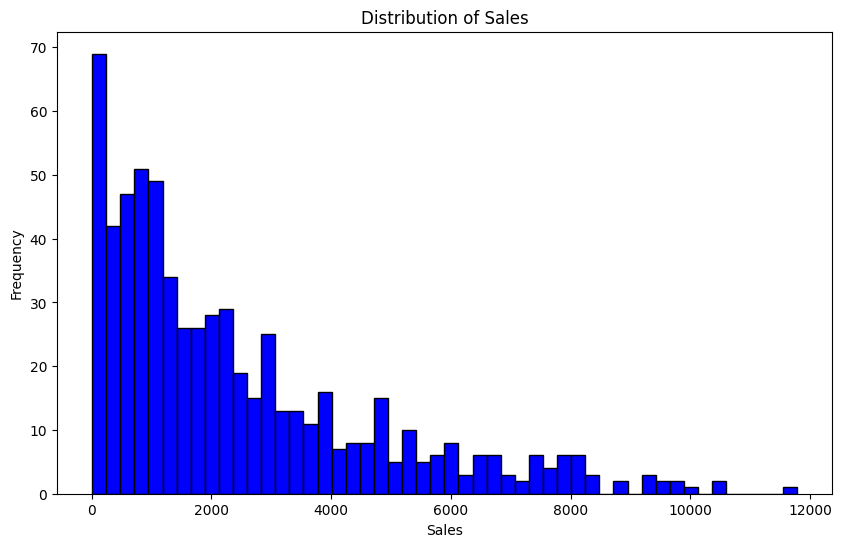

,Order Date,Sales
0,2019-01-01,73.940
1,2019-01-02,405.920
2,2019-01-03,2095.830
3,2019-01-04,1069.220
4,2019-01-05,255.904


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')


missing_data = df[['Order Date', 'Sales']].isnull().sum()


daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.hist(daily_sales['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


daily_sales.head()

In [7]:
import pandas as pd


daily_sales['Month'] = daily_sales['Order Date'].dt.month
daily_sales['Day_of_Week'] = daily_sales['Order Date'].dt.dayofweek
daily_sales['Quarter'] = daily_sales['Order Date'].dt.quarter
daily_sales['Week_of_Year'] = daily_sales['Order Date'].dt.isocalendar().week


daily_sales['Lag_1'] = daily_sales['Sales'].shift(1)  # Previous day's sales
daily_sales['Lag_7'] = daily_sales['Sales'].shift(7)  # Previous week's sales (7 days ago)
daily_sales['Lag_30'] = daily_sales['Sales'].shift(30)  # Previous month's sales (30 days ago)


daily_sales['Is_Christmas'] = daily_sales['Order Date'].apply(lambda x: 1 if x.month == 12 and x.day == 25 else 0)
daily_sales['Is_Black_Friday'] = daily_sales['Order Date'].apply(lambda x: 1 if x.month == 11 and x.weekday() == 4 and 23 <= x.day <= 29 else 0)


daily_sales.head()


,Order Date,Sales,Month,Day_of_Week,Quarter,Week_of_Year,Lag_1,Lag_7,Lag_30,Is_Christmas,Is_Black_Friday
0,2019-01-01,73.940,1,1,1,1,NaN,NaN,NaN,0,0
1,2019-01-02,405.920,1,2,1,1,73.94,NaN,NaN,0,0
2,2019-01-03,2095.830,1,3,1,1,405.92,NaN,NaN,0,0
3,2019-01-04,1069.220,1,4,1,1,2095.83,NaN,NaN,0,0
4,2019-01-05,255.904,1,5,1,1,1069.22,NaN,NaN,0,0


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5barsdav/53nogs_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5barsdav/kav2w9in.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65940', 'data', 'file=/tmp/tmp5barsdav/53nogs_e.json', 'init=/tmp/tmp5barsdav/kav2w9in.json', 'output', 'file=/tmp/tmp5barsdav/prophet_modelboc1lgs9/prophet_model-20250711152655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:55 - cmdstanpy - INFO - Chain [1] done proc

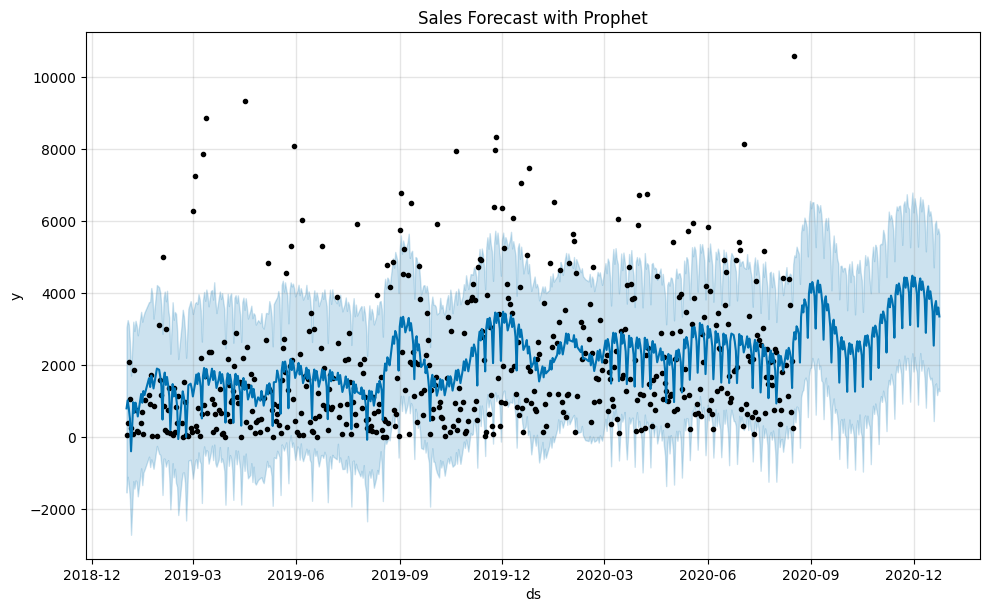

Mean Absolute Error (MAE): 2448.165217871959
Root Mean Squared Error (RMSE): 3044.9113092682696


In [8]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


prophet_data = daily_sales[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})


train_size = int(len(prophet_data) * 0.8)
train_data = prophet_data[:train_size]
test_data = prophet_data[train_size:]

model = Prophet()
model.add_seasonality(name='weekly', period=7, fourier_order=3)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)


model.fit(train_data)


future = model.make_future_dataframe(periods=len(test_data), freq='D')
forecast = model.predict(future)

model.plot(forecast)
plt.title('Sales Forecast with Prophet')
plt.show()


y_true = test_data['y']
y_pred = forecast['yhat'][train_size:]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

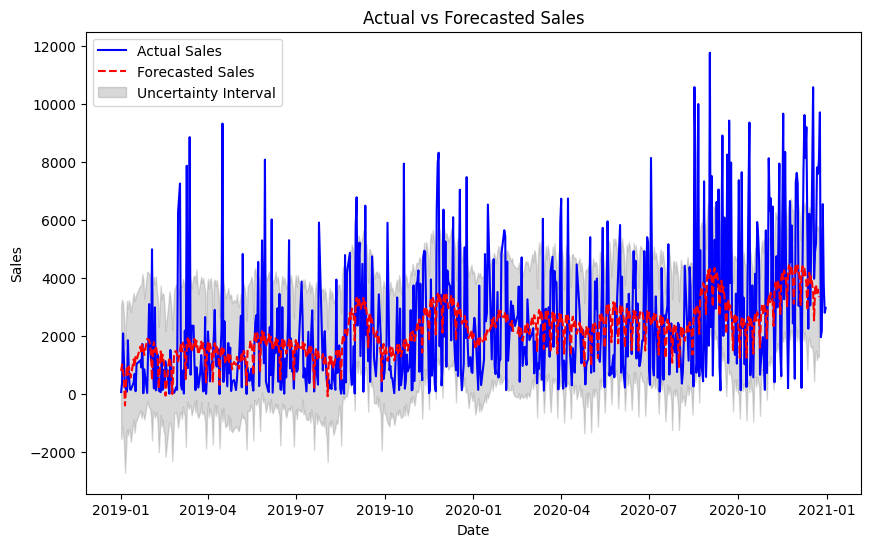

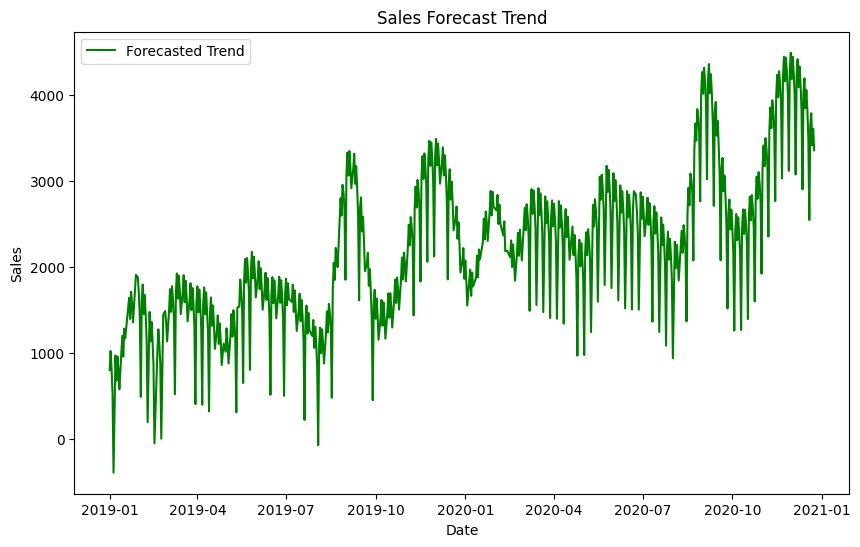

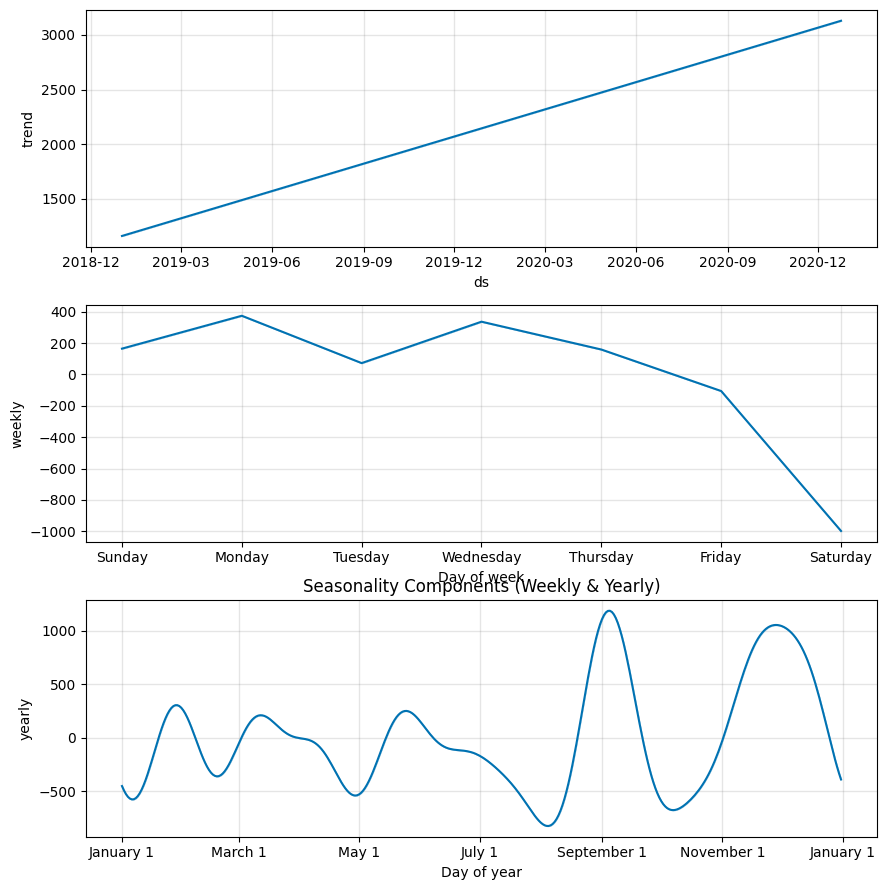

The forecasted sales data has been exported to '/content/forecasted_sales.csv'.


In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Actual Sales', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='red', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3, label='Uncertainty Interval')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Trend', color='green')
plt.title('Sales Forecast Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


fig = model.plot_components(forecast)
plt.title('Seasonality Components (Weekly & Yearly)')
plt.show()


forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_data.to_csv('/content/forecasted_sales.csv', index=False)


print("The forecasted sales data has been exported to '/content/forecasted_sales.csv'.")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5barsdav/r_hb6doc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5barsdav/vfimpjwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41815', 'data', 'file=/tmp/tmp5barsdav/r_hb6doc.json', 'init=/tmp/tmp5barsdav/vfimpjwx.json', 'output', 'file=/tmp/tmp5barsdav/prophet_modeln7hdblcc/prophet_model-20250711152657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

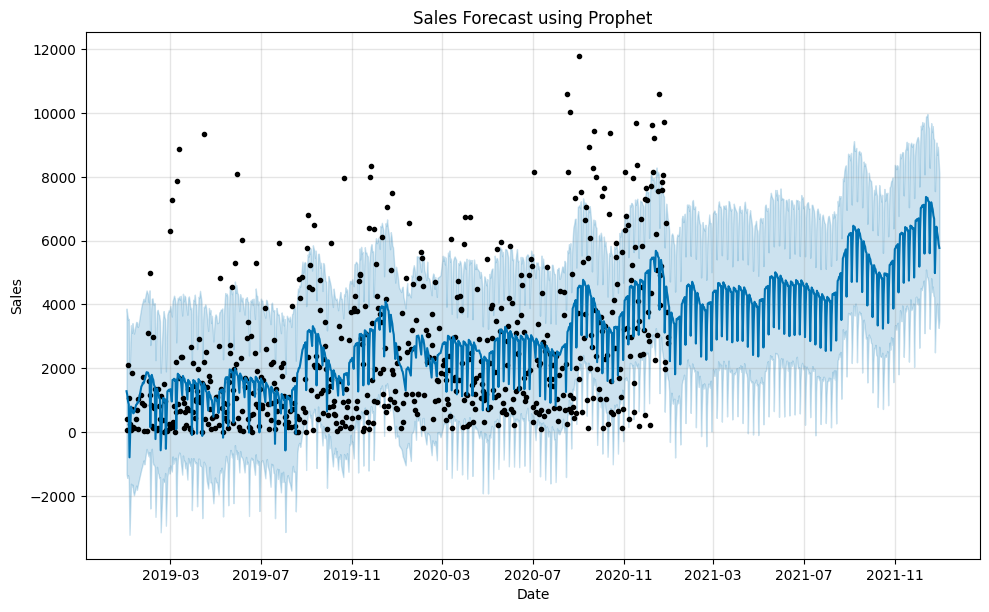

<Figure size 1200x800 with 0 Axes>

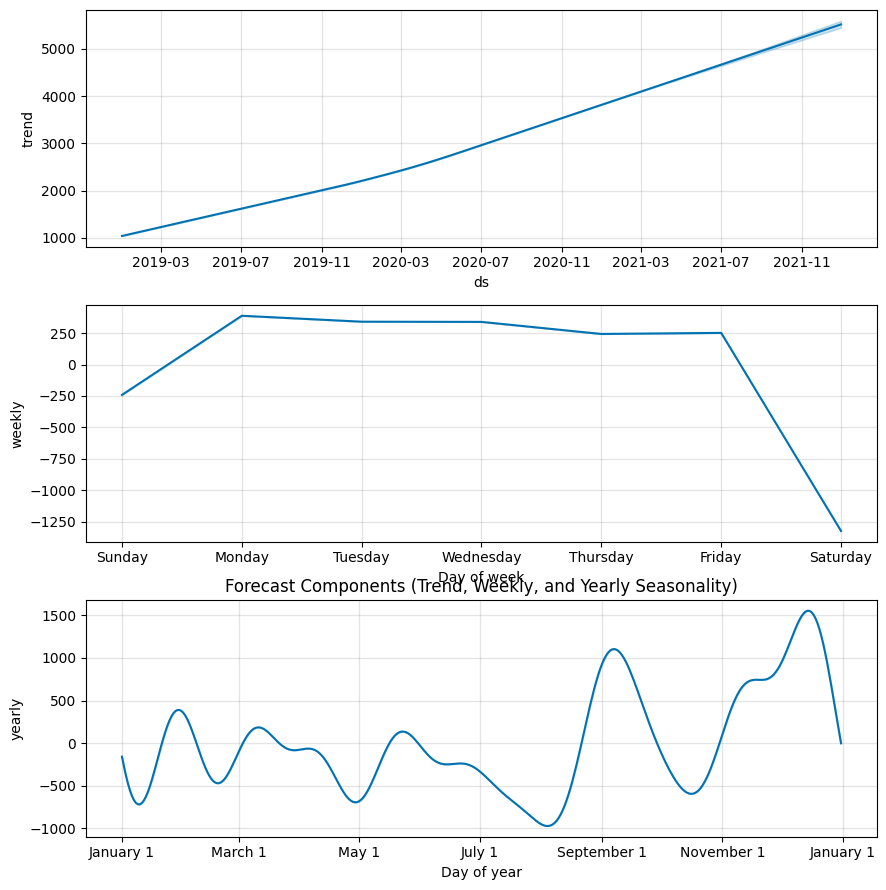

The forecasted sales data has been exported to 'forecasted_sales.csv'.


In [10]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


df_prophet = daily_sales[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})

model = Prophet()


model.fit(df_prophet)

future = model.make_future_dataframe(periods=365)


forecast = model.predict(future)


plt.figure(figsize=(10, 6))
model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


plt.figure(figsize=(12, 8))
model.plot_components(forecast)
plt.title('Forecast Components (Trend, Weekly, and Yearly Seasonality)')
plt.show()


forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_data.to_csv('/content/forecasted_sales.csv', index=False)
print("The forecasted sales data has been exported to 'forecasted_sales.csv'.")

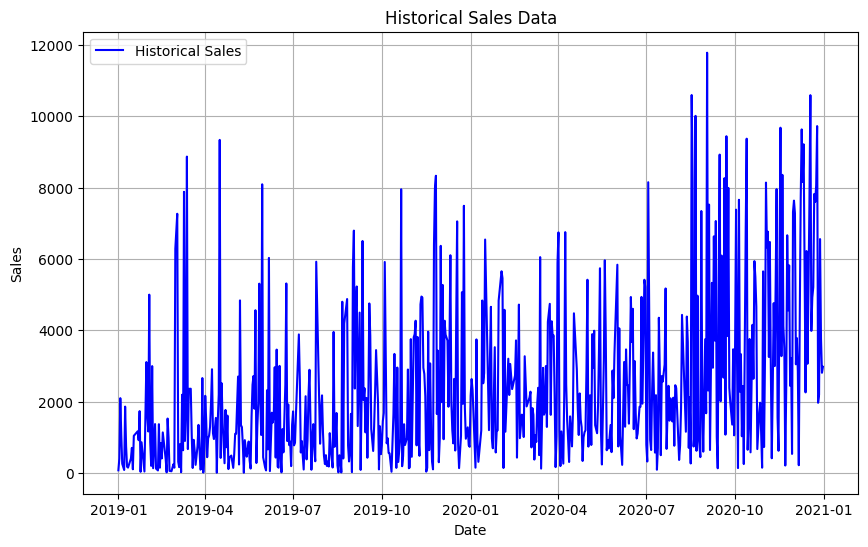

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5barsdav/bz2jprof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5barsdav/y0_j9qzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60601', 'data', 'file=/tmp/tmp5barsdav/bz2jprof.json', 'init=/tmp/tmp5barsdav/y0_j9qzt.json', 'output', 'file=/tmp/tmp5barsdav/prophet_modellamz58_s/prophet_model-20250711152658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


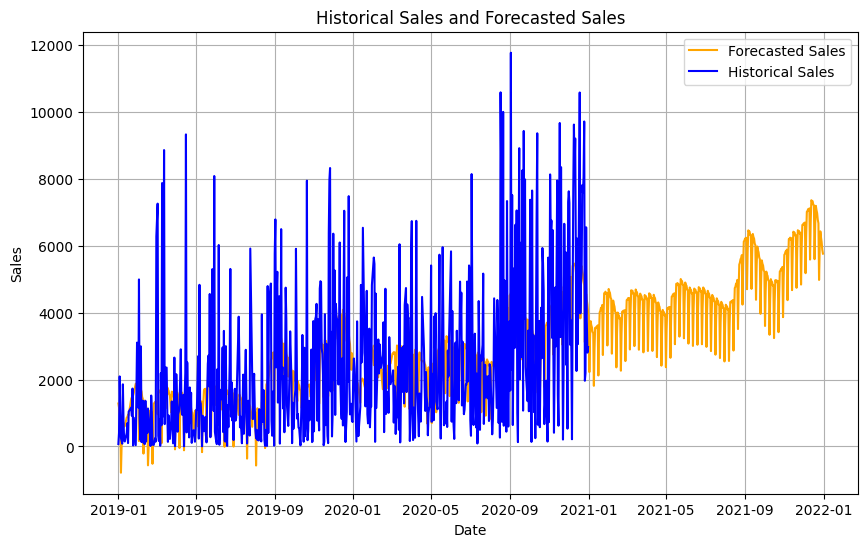

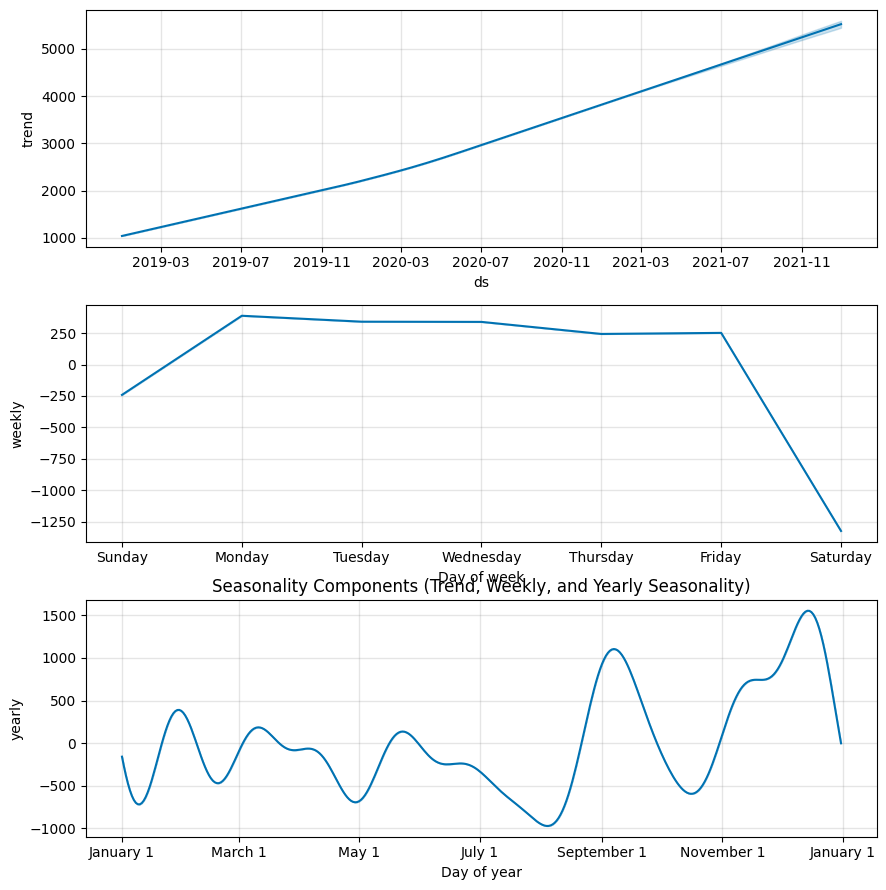

The forecasted sales data has been exported to 'forecasted_sales.csv'.


In [11]:
import matplotlib.pyplot as plt
from prophet import Prophet

plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Historical Sales', color='blue')
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


df_prophet = daily_sales[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})
model = Prophet()


model.fit(df_prophet)

# Make future predictions (e.g., for the next 365 days)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot Historical Sales and Forecasted Sales
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='orange')
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Historical Sales', color='blue')
plt.title('Historical Sales and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


model.plot_components(forecast)
plt.title('Seasonality Components (Trend, Weekly, and Yearly Seasonality)')
plt.show()

forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_data.to_csv('/content/forecasted_sales.csv', index=False)
print("The forecasted sales data has been exported to 'forecasted_sales.csv'.")